<a href="https://colab.research.google.com/github/Amiya-Kalita/Machine-Learning/blob/main/4_Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
import pickle

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DataSets/StudentsPerformance.csv")

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


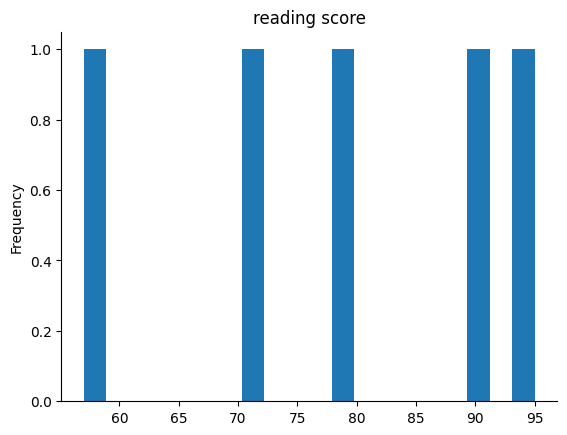

In [6]:
from matplotlib import pyplot as plt
_df_9['reading score'].plot(kind='hist', bins=20, title='reading score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
df.shape

(1000, 8)

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [12]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}: {df[col].unique()}")


gender: ['female' 'male']

race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch: ['standard' 'free/reduced']

test preparation course: ['none' 'completed']


In [13]:
x = df.drop('math score', axis=1)
y = df['math score']

In [14]:
x.shape

(1000, 7)

In [15]:
y.shape

(1000,)

In [16]:
print(x.columns.tolist())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score']


In [17]:
x_encoded = x.copy()
label_encoders = {}

# Encode each categorical column
for col in x_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    x_encoded[col] = le.fit_transform(x_encoded[col])
    label_encoders[col] = le

    print(f"\n{col}:")
    print(f"  Original: {x[col].unique()}")
    print(f"  Encoded: {x_encoded[col].unique()}")

print("\nEncoded Features:")
print(x_encoded.head())


gender:
  Original: ['female' 'male']
  Encoded: [0 1]

race/ethnicity:
  Original: ['group B' 'group C' 'group A' 'group D' 'group E']
  Encoded: [1 2 0 3 4]

parental level of education:
  Original: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
  Encoded: [1 4 3 0 2 5]

lunch:
  Original: ['standard' 'free/reduced']
  Encoded: [1 0]

test preparation course:
  Original: ['none' 'completed']
  Encoded: [1 0]

Encoded Features:
   gender  race/ethnicity  ...  reading score  writing score
0       0               1  ...             72             74
1       0               2  ...             90             88
2       0               1  ...             95             93
3       1               0  ...             57             44
4       1               2  ...             78             75

[5 rows x 7 columns]


In [21]:
x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y,
    test_size=0.2,      # 20% for testing
    random_state=42     # For reproducibility
)

In [22]:
model = RandomForestRegressor(
    n_estimators=100,      # Number of trees in the forest
    random_state=42,       # For reproducibility
    max_depth=10,          # Maximum depth of each tree
    min_samples_split=5    # Minimum samples to split a node
)

print("\nTraining the model...")
# Train the model using training data
model.fit(x_train, y_train)
print("Model training completed!")


Training the model...
Model training completed!


In [23]:
y_train_pred = model.predict(x_train)

# Predict on testing data
y_test_pred = model.predict(x_test)

print("\nPredictions made successfully!")
print(f"Training predictions shape: {y_train_pred.shape}")
print(f"Testing predictions shape: {y_test_pred.shape}")

# Show some example predictions vs actual values
print("\nFirst 10 Test Predictions vs Actual Values:")
comparison_df = pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': y_test_pred[:10],
    'Difference': y_test[:10].values - y_test_pred[:10]
})
print(comparison_df)


Predictions made successfully!
Training predictions shape: (800,)
Testing predictions shape: (200,)

First 10 Test Predictions vs Actual Values:
   Actual  Predicted  Difference
0      91  76.527978   14.472022
1      53  56.126243   -3.126243
2      80  76.226049    3.773951
3      74  76.789082   -2.789082
4      84  81.699891    2.300109
5      81  85.690091   -4.690091
6      69  65.929212    3.070788
7      54  54.858635   -0.858635
8      87  73.798189   13.201811
9      51  52.855726   -1.855726


In [25]:
train_r2 = r2_score(y_train , y_train_pred)
train_r2

0.9508740140108833

In [26]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_rmse

np.float64(3.3279618440491774)

In [27]:
test_r2 = r2_score(y_test, y_test_pred)
test_r2

0.8528035143337531

In [28]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_rmse

np.float64(5.984860675708955)

In [29]:
feature_importance = pd.DataFrame({
    'Feature': x_encoded.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFEATURE IMPORTANCE:")
print("="*60)
print(feature_importance)
print("\nMost important feature:", feature_importance.iloc[0]['Feature'])


FEATURE IMPORTANCE:
                       Feature  Importance
5                reading score    0.575076
6                writing score    0.235832
0                       gender    0.124850
1               race/ethnicity    0.022424
2  parental level of education    0.016919
3                        lunch    0.014854
4      test preparation course    0.010046

Most important feature: reading score


In [31]:
# Save the trained model for future use
with open('student_performance_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("\n✓ Model saved as 'student_performance_model.pkl'")


✓ Model saved as 'student_performance_model.pkl'


In [33]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the original dataset to fit encoders
df = pd.read_csv('StudentsPerformance.csv')

# List of categorical columns
categorical_cols = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

# Fit label encoders on the original data
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df[col])
    encoders[col] = le

# Create new student data
new_student = pd.DataFrame({
    'gender': ['female'],
    'race/ethnicity': ['group B'],
    'parental level of education': ["bachelor's degree"],
    'lunch': ['standard'],
    'test preparation course': ['completed'],
    'reading score': [85],
    'writing score': [82]
})

# Encode categorical columns in new student data
for col in categorical_cols:
    new_student[col] = encoders[col].transform(new_student[col])

# Load the trained model
with open('student_performance_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict math score
predicted_math_score = loaded_model.predict(new_student)
print(f"Predicted Math Score: {predicted_math_score[0]:.2f}")

FileNotFoundError: [Errno 2] No such file or directory: 'StudentsPerformance.csv'